In [164]:
from pysis.isis import campt, camrange
import pvl
from shapely.geometry import box, polygon

In [178]:
from pathlib import Path
p = Path('/Volumes/Data/planet4/season2_3_EDRs/')

In [179]:
paths = list(p.glob('*.cub'))

In [86]:
from planet4.region_data import Inca

In [92]:
season2 = [path for path in paths if path.stem[9:] in Inca.season2]

In [94]:
season3 = [path for path in paths if path.stem[9:] in Inca.season3]

In [173]:
def get_box(path):
    label = pvl.load(str(path) + '.range.lbl.txt')
    minx = label['UniversalGroundRange']['MinimumLongitude']
    maxx = label['UniversalGroundRange']['MaximumLongitude']
    miny = label['LatitudeRange']['MinimumLatitude']
    maxy = label['LatitudeRange']['MaximumLatitude']
    return box(minx, miny, maxx, maxy)

In [163]:
[p for p in paths if get_box(p).bounds[0] < 296]

[PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_011491_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_011544_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_011557_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_011623_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_011702_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_011729_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_011900_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_012256_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_012467_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_012744_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_013034_0985.cub'),
 PosixPath('/Volumes/Data/planet4/season2_3_EDRs/redMosaicESP_013113_0985.cub'),
 PosixPath('/Volumes/Data/pl

In [180]:
boxes = [get_box(p) for p in paths]

In [177]:
get_box(paths[0])

IndexError: list index out of range

In [193]:
rightboxes = [b for b in boxes if b.bounds[0] > 295.7]

In [194]:
leftboxes = [b for b in boxes if b.bounds[0] < 295.7]

In [185]:
len(leftboxes)

25

In [186]:
len(boxes)

30

In [213]:
intersect = rightboxes[0].intersection(rightboxes[1])

In [214]:
n = 2
for b in leftboxes[2:]:
    if b.area < 0.1:
        continue
    temp = intersect.intersection(b)
    if temp.area == 0:
        continue
    intersect = intersect.intersection(b)
    n+=1

In [215]:
n

10

In [202]:
len(rightboxes)

14

In [203]:
intersect.bounds

(295.98371057394, -81.511271143319, 296.00015580967, -81.446524837762)

In [108]:
s2boxes = [get_box(p) for p in season2]
s3boxes = [get_box(p) for p in season3]

In [44]:
from shapely.ops import cascaded_union

In [109]:
%matplotlib inline

In [110]:
import seaborn as sns

In [115]:
s2boxes[0].bounds

(295.4800179347, -81.709992746772, 296.6202619436, -81.144314194354)

In [205]:
[box.area for box in rightboxes]

[0.17079593469936094,
 0.15788313817753352,
 0.23736615549913223,
 0.08589468460224442,
 0.10740181747258291,
 0.0880500616995887,
 0.2822373951760499,
 0.360806171406936,
 0.024305696359743306,
 0.3114783386591775,
 0.07955397946798672,
 0.12665883020262383,
 0.19408368324201003,
 0.505014507234869]

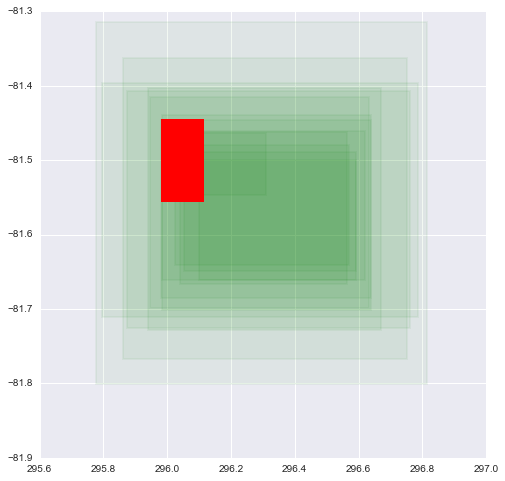

In [216]:
from matplotlib.patches import Polygon
from itertools import cycle
fig, ax = plt.subplots(figsize=(8, 8))

# for polygon in leftboxes:
#     mpl_poly = Polygon(np.array(polygon.exterior), color='g',
#                        lw=2, alpha=0.1)
#     ax.add_patch(mpl_poly)

for polygon in rightboxes:
    mpl_poly = Polygon(np.array(polygon.exterior), color='g',
                       lw=2, alpha=0.05)
    ax.add_patch(mpl_poly)


ax.add_patch(Polygon(np.array(intersect.exterior), color='r',
                     lw=2))

ax.relim()
ax.autoscale()

In [161]:
intersect.bounds

(295.98388799452, -81.511271143319, 296.00015580967, -81.461043337855)

In [128]:
from shapely import iterops

In [130]:
from shapely.examples import intersect

In [134]:
intersect??

In [126]:
areas = [b.area for b in s2boxes if b.bounds[0] < 296]

In [127]:
len(areas)

12

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.08589468,  0.0880454 ,  0.09019611,  0.09234682,  0.09449754,
         0.09664825,  0.09879896,  0.10094968,  0.10310039,  0.1052511 ,
         0.10740182]),
 <a list of 10 Patch objects>)

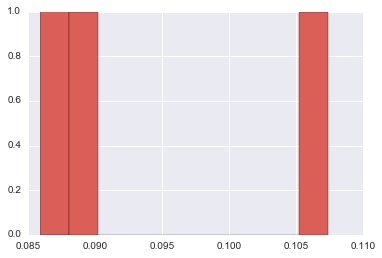

In [120]:
plt.hist(areas)

In [79]:
from rtree import index

In [80]:
idx = index.Index()

In [81]:
for pos, cell in enumerate(boxes):
    idx.insert(pos, cell.bounds)

In [84]:
for poly in boxes:
    merged_cells = cascaded_union([boxes[i] for i in idx.intersection(poly.bounds)])
    print(poly.intersection(merged_cells).area)

0.6450115803578395
0.2283389912108004
0.17079593469936094
0.15788313817753352
0.23736615549913223
0.5566969663991909
0.2965538898240721
0.11704261912071527
0.08589468460224442
0.025234124868628485
0.10740181747258291
0.08995763189634351
0.0880500616995887
0.16355753203619108
0.2440798294434039
0.3876863529317723
0.2822373951760499
0.3419409551550178
0.24512089405946103
0.360806171406936
0.0839479975741147
0.024305696359743306
0.05220684020497443
0.0639469323765979
0.3114783386591775
0.07955397946798672
0.12665883020262383
0.19408368324201003
0.505014507234869
0.07205800764343229
